# Principal component analysis (PCA)
### A method for dimensionality reduction

 Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

## Import Training Data

In [117]:
import pandas as pd
temp_data = pd.read_csv('log10-ModelSource.csv')
temp_data = temp_data.drop(['FileName'], axis=1)

In [118]:
temp_data.head(5)

,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_66,band_67,band_68,band_69,band_70,band_71,band_72,band_73,band_74,band_75
0,-2.140606,-2.392572,-2.516100,-2.577076,-2.215686,-1.551935,-1.065114,-1.582338,-1.940115,-2.035928,...,-3.543196,-3.402855,-3.341555,-2.516502,-3.472576,-3.521400,-3.618490,-3.894970,-3.687545,-3.859923
1,-2.062704,-2.312972,-2.434123,-2.495107,-2.141010,-1.462172,-0.988078,-1.507656,-1.872941,-1.959134,...,-3.497375,-3.329462,-3.186980,-2.461540,-3.396129,-3.434170,-3.556581,-3.859483,-3.597592,-3.789966
2,-3.235083,-3.480436,-3.596995,-3.666678,-3.293784,-2.637680,-2.143351,-2.664226,-3.039011,-3.120337,...,-4.621138,-4.498715,-4.443107,-3.615738,-4.551180,-4.608040,-4.722734,-4.986785,-4.769869,-4.941696
3,-2.188604,-2.446040,-2.556112,-2.618936,-2.258369,-1.598768,-1.076724,-1.618088,-1.987968,-2.101140,...,-3.578690,-3.450467,-3.365121,-2.598056,-3.526267,-3.556170,-3.686185,-3.936783,-3.733665,-3.890105
4,-2.203557,-2.414181,-2.589072,-2.625364,-2.278265,-1.600599,-1.092146,-1.646593,-2.005547,-2.127066,...,-3.582750,-3.452107,-3.364222,-2.658818,-3.549504,-3.569769,-3.687697,-3.936076,-3.786438,-3.897226


In [119]:
new_temp_data = temp_data.T

In [120]:
new_temp_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
band_0,-2.140606,-2.062704,-3.235083,-2.188604,-2.203557,-2.193638,-2.181492,-2.193073,-2.170176,-2.739007,...,-2.218557,-2.283653,-2.226727,-3.214214,-2.102025,-2.163254,-3.219722,-2.183004,-2.157446,-2.279291
band_1,-2.392572,-2.312972,-3.480436,-2.446040,-2.414181,-2.389950,-2.367987,-2.371327,-2.417019,-2.928260,...,-2.382464,-2.397035,-2.458689,-3.465451,-2.343834,-2.401245,-3.452004,-2.385682,-2.354262,-2.467233
band_2,-2.516100,-2.434123,-3.596995,-2.556112,-2.589072,-2.569777,-2.545398,-2.544822,-2.534361,-3.114805,...,-2.583593,-2.617264,-2.605442,-3.592462,-2.468280,-2.524185,-3.579467,-2.553818,-2.541695,-2.661145
band_3,-2.577076,-2.495107,-3.666678,-2.618936,-2.625364,-2.600136,-2.587194,-2.576424,-2.599936,-3.142469,...,-2.622790,-2.626545,-2.649342,-3.669737,-2.539957,-2.605658,-3.651804,-2.608242,-2.574565,-2.700687
band_4,-2.215686,-2.141010,-3.293784,-2.258369,-2.278265,-2.262396,-2.243648,-2.236540,-2.233544,-2.801784,...,-2.261672,-2.291147,-2.287051,-3.287081,-2.161805,-2.219938,-3.271766,-2.241744,-2.220145,-2.339143


## Graph

No handles with labels found to put in legend.


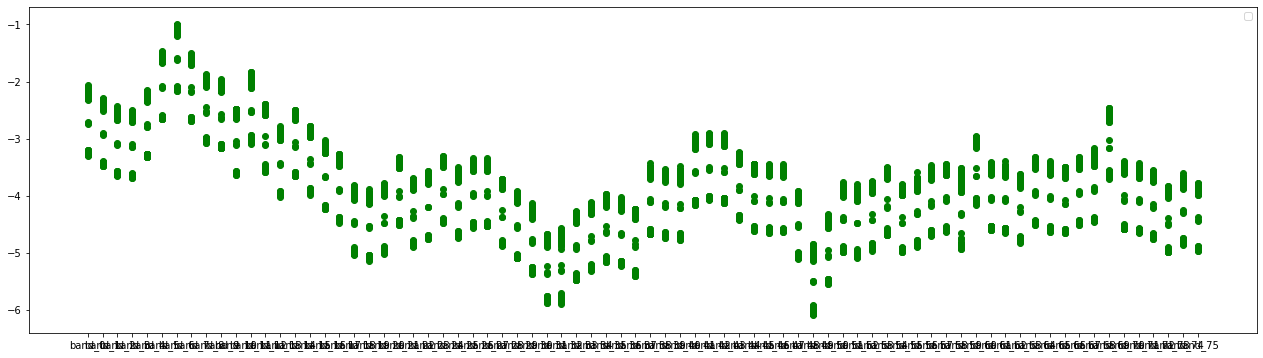

In [121]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(22, 6))

for i in range(200):
    plt.scatter(new_temp_data.index,temp_data.iloc[i,:],color='green')

plt.legend()
plt.show()

## Correlation matrix

In [142]:
import pandas as pd
import numpy as np


corr = temp_data.corr()
corr.style.background_gradient(cmap='coolwarm')

## Import Target Data

In [144]:
import pandas as pd
bands_data = pd.read_csv('log10-bands.csv')
bands_data = bands_data.drop(['FileName'], axis=1)
new_bands_data = bands_data.T

No handles with labels found to put in legend.


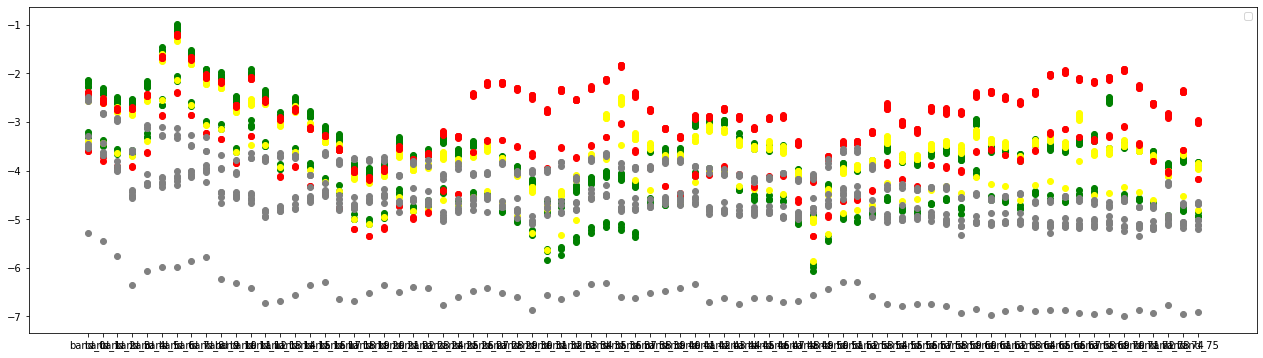

In [135]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(22, 6))

# Normal Data
for i in range(10):
    plt.scatter(new_bands_data.index,new_bands_data.iloc[:,i],color='green')

# Might be abnormal
for i in range(11,20):
    plt.scatter(new_bands_data.index,new_bands_data.iloc[:,i],color='yellow')

# Abnormal
for i in range(21,30):
    plt.scatter(new_bands_data.index,new_bands_data.iloc[:,i],color='red')

# No voice
for i in range(31,40):
    plt.scatter(new_bands_data.index,new_bands_data.iloc[:,i],color='grey')

plt.legend()
plt.show()

In [146]:
from sklearn.preprocessing import StandardScaler
from numpy.testing import assert_almost_equal

# 將類型以外的特徵全取出
X = bands_data  # (n_samples, n_features)

# 使用 scikit-learn 正規化
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)  # 注意維度

# 手動正規化
# 注意數據（母體）而非抽樣，自由度 = 0
Z = (X - X.mean(axis=0)) / X.std(axis=0, ddof=0)
assert_almost_equal(Z, Z_sk)

# 更新我們的 DataFrame
# new_bands_data.iloc[:, 1:] = Z

# 展示前 5 rows
print("正規化後前五名數據：")
display(Z.head(5).style\
        .format("{:.2f}", subset=Z.columns[1:]))

# 顯示各特徵的平均與標準差
print("各特徵平均與標準差：")
df_stats = Z.describe().loc[['mean', 'std']]
df_stats.style.format("{:.2f}")

正規化後前五名數據：


,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,band_10,band_11,band_12,band_13,band_14,band_15,band_16,band_17,band_18,band_19,band_20,band_21,band_22,band_23,band_24,band_25,band_26,band_27,band_28,band_29,band_30,band_31,band_32,band_33,band_34,band_35,band_36,band_37,band_38,band_39,band_40,band_41,band_42,band_43,band_44,band_45,band_46,band_47,band_48,band_49,band_50,band_51,band_52,band_53,band_54,band_55,band_56,band_57,band_58,band_59,band_60,band_61,band_62,band_63,band_64,band_65,band_66,band_67,band_68,band_69,band_70,band_71,band_72,band_73,band_74,band_75
0,-0.633837,-0.66,-0.62,-0.33,-0.28,-0.09,0.03,-0.11,-0.25,-0.09,-0.26,0.02,-0.17,-0.38,-0.23,-0.32,-0.65,-0.53,-0.94,-1.03,-1.07,-0.57,-0.98,-0.82,-0.53,-0.89,-0.83,-0.93,-1.04,-1.06,-1.06,-1.28,-1.29,-1.35,-1.43,-1.52,-1.35,-1.46,-0.99,-0.97,-0.95,-0.51,-0.39,-0.49,-0.68,-0.79,-0.82,-0.81,-1.11,-1.64,-1.45,-1.33,-1.41,-1.12,-0.84,-0.90,-1.00,-0.92,-0.80,-0.85,-0.37,-0.75,-0.78,-0.83,-0.65,-0.73,-0.75,-0.75,-0.55,0.01,-0.69,-0.69,-0.69,-0.95,-0.84,-0.85
1,1.03319,0.87,0.92,0.90,0.95,0.82,0.86,0.88,0.93,0.88,0.93,0.99,0.87,0.83,0.90,1.05,0.93,0.95,0.79,0.80,0.81,1.01,0.85,0.87,0.84,0.69,0.33,0.28,0.04,0.04,0.01,-0.21,-0.26,-0.24,-0.31,-0.48,-0.48,-0.39,0.34,0.53,0.70,0.90,0.84,0.76,0.62,0.59,0.50,0.47,0.41,0.02,0.24,0.37,0.29,0.34,0.38,0.42,0.41,0.35,0.42,0.49,0.61,0.30,0.32,0.28,0.40,0.20,0.13,0.16,0.44,0.87,0.20,0.33,0.38,0.30,0.20,0.42
2,-0.78865,-0.80,-0.77,-0.41,-0.38,-0.20,-0.05,-0.20,-0.30,-0.20,-0.35,-0.09,-0.24,-0.52,-0.34,-0.43,-0.79,-0.73,-1.10,-1.15,-1.16,-0.75,-1.05,-1.01,-0.64,-0.99,-0.91,-0.97,-1.13,-1.13,-1.13,-1.32,-1.32,-1.42,-1.50,-1.56,-1.40,-1.52,-1.06,-1.15,-1.14,-0.63,-0.50,-0.57,-0.77,-0.88,-0.96,-0.94,-1.20,-1.73,-1.60,-1.42,-1.59,-1.19,-0.90,-0.98,-1.09,-0.95,-0.87,-1.01,-0.44,-0.83,-0.84,-0.91,-0.70,-0.81,-0.82,-0.82,-0.63,-0.05,-0.75,-0.75,-0.77,-1.02,-0.91,-0.93
3,1.06686,1.04,0.99,0.98,1.02,0.90,0.90,0.92,0.96,0.96,1.00,1.06,0.91,0.91,0.97,1.10,1.01,1.05,0.83,0.84,0.81,1.09,0.89,1.00,0.91,0.72,0.44,0.28,0.08,0.05,-0.03,-0.29,-0.37,-0.20,-0.31,-0.47,-0.47,-0.39,0.39,0.63,0.72,0.96,0.88,0.78,0.75,0.70,0.56,0.56,0.52,-0.03,0.33,0.48,0.34,0.41,0.40,0.50,0.48,0.38,0.46,0.48,0.69,0.35,0.37,0.35,0.44,0.20,0.25,0.20,0.50,0.92,0.24,0.36,0.43,0.37,0.23,0.45
4,1.0084,0.85,0.90,0.88,0.94,0.80,0.85,0.87,0.91,0.87,0.91,0.97,0.85,0.81,0.88,1.04,0.92,0.91,0.72,0.70,0.72,1.01,0.77,0.81,0.81,0.66,0.32,0.26,-0.00,-0.00,-0.07,-0.39,-0.40,-0.24,-0.38,-0.53,-0.54,-0.43,0.31,0.50,0.65,0.88,0.82,0.75,0.62,0.57,0.50,0.45,0.43,-0.09,0.20,0.37,0.21,0.34,0.34,0.41,0.39,0.33,0.41,0.32,0.62,0.30,0.30,0.30,0.39,0.18,0.13,0.14,0.38,0.87,0.19,0.31,0.38,0.29,0.20,0.40


各特徵平均與標準差：


,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,band_10,band_11,band_12,band_13,band_14,band_15,band_16,band_17,band_18,band_19,band_20,band_21,band_22,band_23,band_24,band_25,band_26,band_27,band_28,band_29,band_30,band_31,band_32,band_33,band_34,band_35,band_36,band_37,band_38,band_39,band_40,band_41,band_42,band_43,band_44,band_45,band_46,band_47,band_48,band_49,band_50,band_51,band_52,band_53,band_54,band_55,band_56,band_57,band_58,band_59,band_60,band_61,band_62,band_63,band_64,band_65,band_66,band_67,band_68,band_69,band_70,band_71,band_72,band_73,band_74,band_75
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01


(-12.41160037910462, 31.618348574406937, -3.7634398065584462, 4.68595103556078)

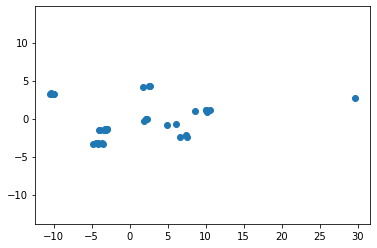

In [137]:
from sklearn.decomposition import PCA

# 宣告主成份個數
n_components = 5
random_state = 9527

pca = PCA(n_components=n_components, random_state=random_state)

# 對正規化後的特徵 Z 做 PCA
L = pca.fit_transform(Z)  # (n_samples, n_components)

# 將投影到第一主成分在 x 軸，第二主成分在 y 軸
plt.scatter(L[:, 0], L[:, 1])
plt.axis('equal')

In [138]:
"""
解析數據的主成份所代表的意涵。
顏色越突出代表其絕對值越大
"""

import numpy as np
pcs = np.array(pca.components_) # (n_comp, n_features)

df_pc = pd.DataFrame(pcs, columns=bands_data.columns[:])
df_pc.index = [f"第{c}主成分" for c in['一', '二', '三', '四', '五']]
df_pc.style\
    .background_gradient(cmap='bwr_r', axis=None)\
    .format("{:.2}")

,band_0,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,band_10,band_11,band_12,band_13,band_14,band_15,band_16,band_17,band_18,band_19,band_20,band_21,band_22,band_23,band_24,band_25,band_26,band_27,band_28,band_29,band_30,band_31,band_32,band_33,band_34,band_35,band_36,band_37,band_38,band_39,band_40,band_41,band_42,band_43,band_44,band_45,band_46,band_47,band_48,band_49,band_50,band_51,band_52,band_53,band_54,band_55,band_56,band_57,band_58,band_59,band_60,band_61,band_62,band_63,band_64,band_65,band_66,band_67,band_68,band_69,band_70,band_71,band_72,band_73,band_74,band_75
第一主成分,-0.11,-0.11,-0.11,-0.12,-0.12,-0.11,-0.11,-0.11,-0.11,-0.11,-0.12,-0.11,-0.11,-0.12,-0.11,-0.11,-0.11,-0.11,-0.099,-0.09,-0.096,-0.12,-0.11,-0.11,-0.12,-0.12,-0.12,-0.12,-0.11,-0.11,-0.11,-0.089,-0.092,-0.1,-0.1,-0.11,-0.1,-0.11,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.076,-0.1,-0.11,-0.11,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12,-0.11,-0.12,-0.12,-0.12,-0.12,-0.12,-0.12
第二主成分,-0.15,-0.16,-0.15,-0.14,-0.15,-0.12,-0.12,-0.12,-0.12,-0.12,-0.13,-0.1,-0.13,-0.12,-0.14,-0.16,-0.14,-0.16,-0.12,-0.13,-0.13,-0.14,-0.12,-0.11,-0.075,-0.035,0.092,0.11,0.16,0.18,0.2,0.25,0.25,0.21,0.21,0.16,0.15,0.16,0.043,0.00047,-0.043,-0.077,-0.1,-0.063,-0.031,-0.042,-0.00075,0.011,0.023,0.12,0.064,0.017,0.026,0.026,0.03,0.032,0.014,0.046,0.021,0.037,-0.012,0.066,0.061,0.086,0.053,0.1,0.12,0.054,0.081,0.00021,0.11,0.086,0.067,0.1,0.11,0.055
第三主成分,0.12,0.095,0.084,-0.041,-0.019,-0.13,-0.17,-0.14,-0.11,-0.15,-0.094,-0.12,-0.098,-0.024,-0.066,-0.049,0.081,0.082,0.24,0.28,0.26,0.045,0.2,0.15,0.0056,0.089,-0.011,-0.031,0.02,0.03,0.057,0.14,0.093,0.055,0.062,0.0097,-0.047,0.016,0.012,0.095,0.11,-0.013,-0.054,-0.063,-0.026,-0.012,-0.017,-0.0039,0.086,0.33,0.27,0.22,0.22,0.088,-0.065,-0.0034,-0.0023,-0.05,-0.062,-0.068,-0.12,-0.096,-0.083,-0.05,-0.11,-0.11,-0.098,-0.13,-0.11,-0.14,-0.11,-0.11,-0.09,0.013,-0.088,-0.043
第四主成分,-0.049,0.047,0.042,0.017,-0.0044,0.056,0.02,0.026,0.006,0.012,0.01,-0.16,0.043,0.057,0.045,0.011,0.0094,0.039,0.022,0.022,0.013,-0.035,0.0028,-0.048,-0.086,-0.048,-0.15,-0.11,-0.093,-0.14,-0.16,-0.15,-0.08,-0.02,0.11,0.42,0.46,0.34,0.036,-0.034,-0.015,-0.098,0.012,-0.014,-0.0021,0.063,0.046,0.013,0.0016,-0.047,-0.047,-0.024,0.078,0.035,0.085,0.016,0.083,0.05,0.063,0.072,-0.076,0.024,0.016,-0.053,-0.03,0.0065,-0.038,0.18,-0.16,-0.38,-0.055,-0.057,-0.065,-0.12,-0.0056,-0.041
第五主成分,-0.089,0.023,-0.14,-0.11,-0.28,-0.16,-0.12,0.027,0.16,0.045,0.12,-0.12,-0.23,-0.26,-0.16,0.27,0.028,-0.052,-0.1,0.047,0.15,0.21,0.11,0.079,-0.08,-0.11,0.021,0.082,-0.17,-0.13,-0.27,-0.1,-0.21,0.055,-0.021,-0.021,-0.057,-0.03,-0.029,-0.037,8.4e-05,0.056,-0.062,-0.036,-0.037,0.11,0.039,-0.1,0.063,0.23,0.045,-0.019,-0.042,-0.056,0.035,0.059,0.17,0.079,0.032,0.073,0.035,0.081,0.088,0.054,0.076,0.016,-0.017,0.054,0.067,0.064,0.0022,0.098,0.13,-0.075,0.11,0.19


In [139]:
# 主成分佔比
pca_10d = PCA(5, random_state=random_state)
pca_10d.fit(Z)
np.round(pca_10d.explained_variance_ratio_, 2)

array([0.84, 0.08, 0.06, 0.01, 0.  ])

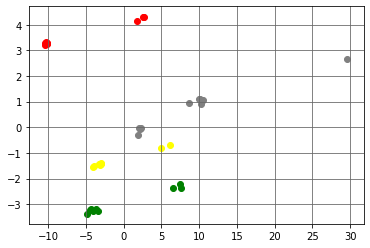

In [140]:
# 對第一主成分與第二主成份做圖
plt.scatter(L[:9, 0], L[:9, 1],color='green')
plt.scatter(L[10:19, 0], L[10:19, 1],color='yellow')
plt.scatter(L[20:29, 0], L[20:29, 1],color='red')
plt.scatter(L[30:, 0], L[30:, 1],color='grey')

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

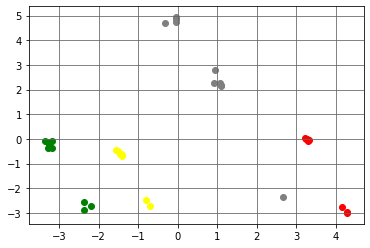

In [141]:
# 對第二主成分與第三主成份做圖
plt.scatter(L[:9, 1], L[:9, 2],color='green')
plt.scatter(L[10:19, 1], L[10:19, 2],color='yellow')
plt.scatter(L[20:29, 1], L[20:29, 2],color='red')
plt.scatter(L[30:, 1], L[30:, 2],color='grey')

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

## citation: 
 - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html